## Introduction

The Coastal Marine Zones dataset used in this notebook can be found <a href="https://www.weather.gov/gis/MarineZones">here.</a>

The <b>marine environment</b> is defined as those waters that are saline and tide-affected.   The <b>coastal zone</b> is defined as those areas of land which border the marine environment.  The coastal zone extends inland to the first major change in topography beyond which coastal processes have little influence).

<b>Examples of coastal ecosystems:</b> Estuaries, coastal dunes, rocky coasts, sandy beaches, coastal cliffs, intertidal (littoral) areas.<br>
<b>Examples of marine ecosystems:</b> Coral reefs, benthic, kelp forests, rocky reefs, continental shelves, sea-mounts, hydro-thermal vents, open oceans, polar oceans.<br>
<b>Oceanic zones:</b> Epipelagic, mesopelagic, bathypelagic, abyssalpelagic, hadalpelagic.<br>
<b>Coastal zones:</b> Inshore, littoral, foreshore, backshore.<br>


<b>Abstract:</b>

Coastal marine forecasts and Special Marine Warnings are issued by zone, each zone identified by a text description and a Universal Generic Code (UGC). These forecasts are prepared by the individual Weather Forecast Office responsible for the zone.

<b>Purpose:</b>

To deliniate the coastal marine zones for the use in creating coastal marine forecasts and warnings.


<b>Overview of Coastal, Offshore and High Seas Marine Zones</b>

<b>Shapefile Type:</b> Polygon<br>
<b>Data source:</b> Coastline derived from US Counties<br>
<b>Naming convention:</b> mzddmmyy (coastal marine zones), ozddmmyy (offshore zones), hzddmmyy (high seas zones)  where ddmmyy = day-month-year<br>

<b>NWS Specifications:</b> NWSI 10-302<br>
<b>Description:</b> The NWS issues marine forecasts, watches, warnings and advisories for a set of defined zone for offshore and coastal waters of the U.S.

In [1]:
#import package python libraries
import os.path, json, io
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (32, 40)

import pyspark.sql.functions as func # resuse as func.coalace for example
from pyspark.sql.types import StringType, IntegerType, FloatType, DoubleType,DecimalType
from pyspark.sql import SparkSession

import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame # Loading boundaries Data
from shapely.geometry import Point, Polygon, shape # creating geospatial data
from shapely import wkb, wkt # creating and parsing geospatial data
from ast import literal_eval as make_tuple # used to decode data from java

In [2]:
# Create SparkSession and attach Sparkcontext to it
spark = SparkSession.builder.appName("coastal-marine-zones-spatial-database").getOrCreate()
sc = spark.sparkContext

## 1. Load Coastal Marine Zones Data

<b>Description : </b>Coastal Marine Zones Including the Great Lakes

Coastal and Great Lakes forecasts are subdivided by zone, each identified by text description and a Universal Generic Code (UGC). The entire text of these forecasts may be found at <a href="http://www.nws.noaa.gov/om/marine/forecast.htm">NWS Marine Text Forecasts and Products Listing</a> which also serves as an alternate source of data. These forecasts are produced by <a href="http://www.nws.noaa.gov/om/marine/marine_map.htm">local National Weather Service Forecast Offices</a>. This page is also available in a text version which includes a synopsis for most of these areas. 
    

In [3]:
# Load the Coastal Marine Zones Including the Great Lakes
mz_df = GeoDataFrame.from_file('/home/tri/Spark/dataset/mz05de17/')

In [4]:
#attribute of dataset
mz_df.columns

Index([u'ID', u'WFO', u'GL_WFO', u'NAME', u'LON', u'LAT', u'geometry'], dtype='object')

In [5]:
#show 5 head of dataset
mz_df.head()

,ID,WFO,GL_WFO,NAME,LON,LAT,geometry
0,PHZ113,HFO,None,Kauai Channel,-158.972420,21.616939,"POLYGON ((-158.745995314 22.08591056400007, -1..."
1,PHZ112,HFO,None,Kauai Leeward Waters,-160.231390,21.664122,"POLYGON ((-159.62633932 22.19913730500002, -15..."
2,GMZ155,BRO,None,Coastal waters from Baffin Bay to Port Mansfie...,-97.157908,26.906845,POLYGON ((-96.88227653499996 26.59007835400007...
3,GMZ657,MFL,None,Coastal waters from East Cape Sable to Chokolo...,-81.389492,25.453694,POLYGON ((-81.34737199999995 25.82093900000007...
4,GMZ656,MFL,None,Coastal waters from Chokoloskee to Bonita Beac...,-81.872501,25.953719,(POLYGON ((-81.35332512199994 25.8227071780000...


Detailed Description of the columns:
- ID: Identifier of zone
- WFO: Identifier of organization responsible for forecast to the zone
- GL_WFO: Great lakes WFO responsible for Open Lake Forecastts
- NAME: Name of zone
- LON: Longitude of centroid zone [decimal degrees]
- LAT: Latitude of centroid of zone [decimal degrees]

In [6]:
mz_df.crs

{'init': u'epsg:4269'}

<b>CRS</b> is the geometric shapes in a geoseries or geodataframe onject are simply a collection of coordinates in a arbitary space.
<b>CRS</b> are referred to using codes called proj4 strings. You can find the codes for most commonly used projections from www.spatialreference.org or remotesensing.org. see : http://geopandas.org/projections.html

## 2. Load Offshore Marine Zones data
<b> Description: Offshore Marine Zones</b>

OFFSHORE WATERS forecasts are subdivided by zone, each identified by text description and a Universal Generic Code (UGC).

In [7]:
#load offshore marine zonesdataset 
oz_df = GeoDataFrame.from_file('/home/tri/Spark/dataset/oz01ap14/')


In [8]:
#show head from dataset
oz_df.head()

,ID,WFO,LON,LAT,LOCATION,NAME,geometry
0,AMZ031,NH2,-79.34953,11.83763,from 11N-15N between 72W-80W,Caribbean from 11N to 15N between 72W and 80W ...,POLYGON ((-72.00606649499997 15.03032157200005...
1,AMZ013,NH2,-81.74130,18.75795,north of 18N between 76W-85W,Caribbean N of 18N between 76W and 85W includi...,POLYGON ((-82.34419558999997 22.48400648500007...
2,AMZ037,NH2,-59.99007,14.44086,from 7N-15N between 55W-60W,Tropical N Atlantic from 7N and 15N between 55...,POLYGON ((-54.98014895199998 15.00294936700004...
3,AMZ121,NH2,-72.99113,24.81218,from 22N-27N between 65W-70W,Atlantic from 22N to 27N between 65W and 70W,POLYGON ((-64.99909230599997 22.00331475900003...
4,AMZ011,NH2,-81.74130,18.75795,from 18N-22N west of 85W to Yucatan Peninsula ...,Caribbean Nof 18N W of 85W including Yucatan B...,POLYGON ((-85.00351240299995 21.65418662700006...


Detailed Description of the columns:
- ID: Identifier of zone
- WFO: Identifier of organization responsible for forecast to the zone
- LON: Longitude of centroid zone [decimal degrees]
- LAT: Latitude of centroid of zone [decimal degrees]
- LOCATION: Location of zone
- NAME: Name of zone

In [9]:
oz_df.crs

{'init': u'epsg:4269'}

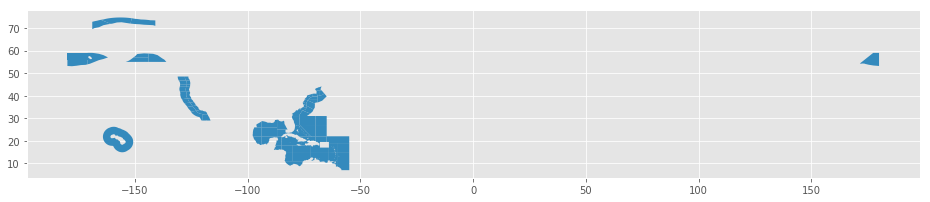

In [10]:
oz_df.plot(figsize=(16, 8))
plt.show()

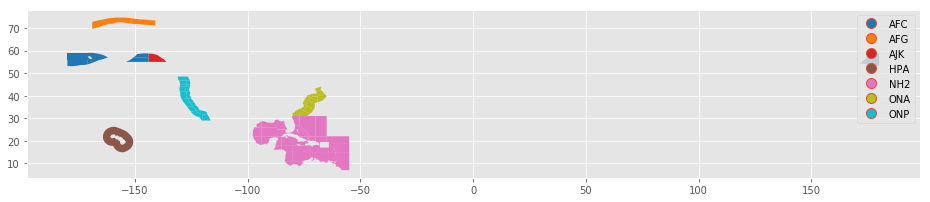

In [11]:
oz_df.plot(column='WFO', categorical=True, legend=True, figsize=(16, 8))
plt.show()

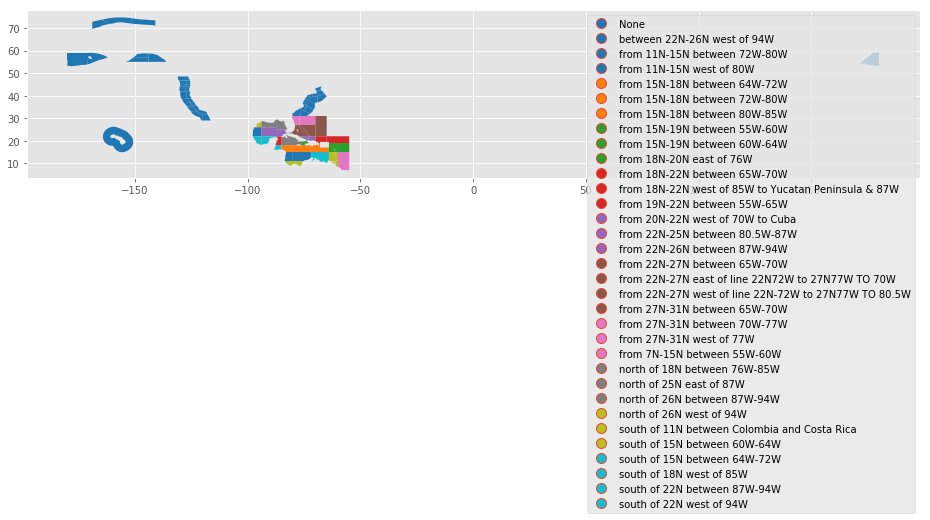

In [12]:
oz_df.plot(column='LOCATION', categorical=True, legend=True, figsize=(16, 8))
plt.show()


## 3. Load "Natural Earth" countries dataset, bundled with GeoPandas

"Natural Earth is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software." It (a subset?) comes bundled with GeoPandas and is accessible from the gpd.datasets module. We'll use it as a helpful global base layer map.


In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [14]:
world.crs

{'init': u'epsg:4326'}

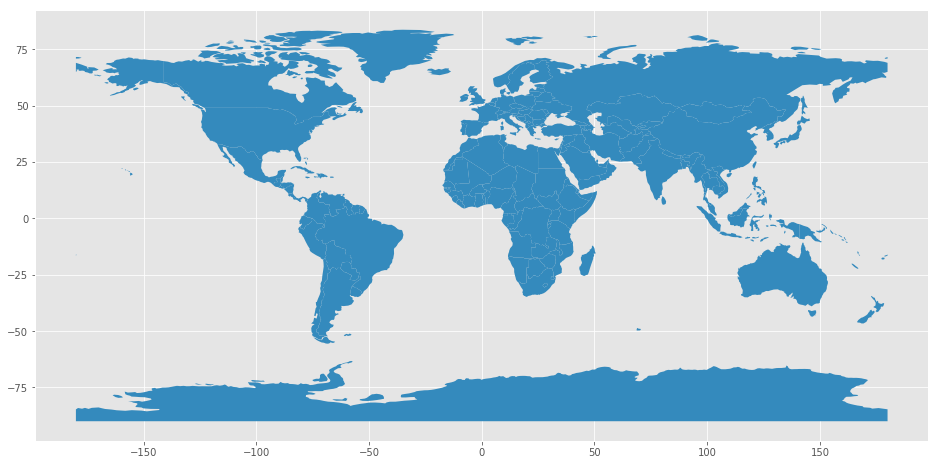

In [15]:
world.plot(figsize=(16,8))
plt.show()

## 4. Map plot overlays: Plotting multiple spatial layers

Here's a compact, quick way of Using GeoDataFrame plot method to overlay two GeoDataFrame. In this case we are overlaying the world and the Offshore Marine Zones.


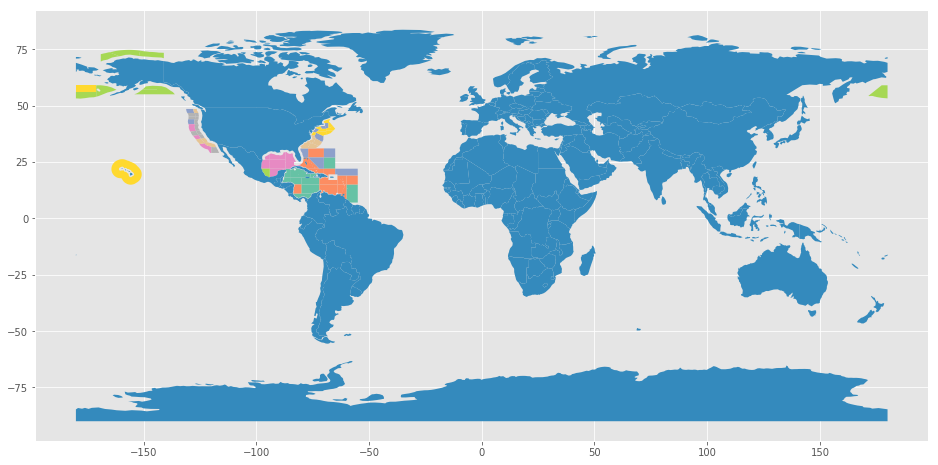

In [16]:
world.plot(ax=oz_df.plot(cmap='Set2', alpha=1, figsize=(16, 8)), alpha=1)
plt.show()

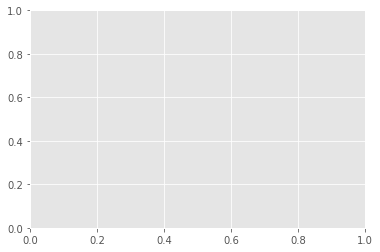

In [17]:
fig, ax = plt.subplots()

In [18]:
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

In [19]:
world.plot(ax=ax)
oz_df.plot(ax=ax)
plt.show();

<Figure size 432x288 with 0 Axes>

## 5. Preparing Data for PySpark

The following cells will introduce some of the aggregation functions available to us in Spark SQL.

Spark expects a geospatial column as a WKT string. Internally it uses this to create OGC Geometries via Java Topology Suite (JTS). So in order to use Spatial Spark we will add the WKT column to our data.


In [20]:
world['wkt'] = pd.Series(
                map(lambda geom: str(geom.to_wkt()), world['geometry']),
                index=world.index, dtype='string')

In [21]:
oz_df['wkt'] = pd.Series(
                map(lambda geom: str(geom.to_wkt()), oz_df['geometry']),
                index=oz_df.index, dtype='string')

mz_df['wkt'] = pd.Series(
                map(lambda geom: str(geom.to_wkt()), mz_df['geometry']),
                index=mz_df.index, dtype='string')

In [22]:
# drop the geometry column because Spark can't infer 
# a schema for it when it's a nested geometry shape
def drop_geometry_column(dataframe, col_drop="geometry"):
    return dataframe.drop(col_drop, axis=1)

## 7: Create a Spark dataframe from GeoPandas

In [23]:
world_spark_df = spark.createDataFrame(drop_geometry_column(world)).cache()

In [24]:
oz_spark_df = spark.createDataFrame(drop_geometry_column(oz_df)).cache()

In [25]:
mz_spark_df = spark.createDataFrame(mz_df).cache()

In [26]:
oz_spark_df.show()

+------+---+---------+--------+--------------------+--------------------+--------------------+
|    ID|WFO|      LON|     LAT|            LOCATION|                NAME|                 wkt|
+------+---+---------+--------+--------------------+--------------------+--------------------+
|AMZ031|NH2|-79.34953|11.83763|from 11N-15N betw...|Caribbean from 11...|POLYGON ((-72.006...|
|AMZ013|NH2| -81.7413|18.75795|north of 18N betw...|Caribbean N of 18...|POLYGON ((-82.344...|
|AMZ037|NH2|-59.99007|14.44086|from 7N-15N betwe...|Tropical N Atlant...|POLYGON ((-54.980...|
|AMZ121|NH2|-72.99113|24.81218|from 22N-27N betw...|Atlantic from 22N...|POLYGON ((-64.999...|
|AMZ011|NH2| -81.7413|18.75795|from 18N-22N west...|Caribbean Nof 18N...|POLYGON ((-85.003...|
|AMZ017|NH2| -81.7413|18.75795|south of 18N west...|    Gulf of Honduras|POLYGON ((-84.999...|
|AMZ019|NH2| -81.7413|18.75795|from 15N-18N betw...|Caribbean from 15...|POLYGON ((-80.001...|
|AMZ021|NH2| -81.7413|18.75795|from 15N-18N betw..

In [27]:
oz_spark_df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- WFO: string (nullable = true)
 |-- LON: double (nullable = true)
 |-- LAT: double (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- wkt: string (nullable = true)



In [28]:
#get statistical value from offshore zone
oz_spark_df.select("LON","LAT").describe().show()

+-------+------------------+-----------------+
|summary|               LON|              LAT|
+-------+------------------+-----------------+
|  count|                80|               80|
|   mean|        -99.040287|33.99717087500001|
| stddev|33.844105819173045| 14.4896042862735|
|    min|           -184.25|         11.83763|
|    max|         -59.99007|           73.283|
+-------+------------------+-----------------+



In [29]:
mz_spark_df.show()

+------+---+------+--------------------+--------------+-------------+--------------------+--------------------+
|    ID|WFO|GL_WFO|                NAME|           LON|          LAT|            geometry|                 wkt|
+------+---+------+--------------------+--------------+-------------+--------------------+--------------------+
|PHZ113|HFO|  null|       Kauai Channel|-158.972419633|21.6169389324|[73137768, false, 2]|POLYGON ((-158.74...|
|PHZ112|HFO|  null|Kauai Leeward Waters|-160.231390339|21.6641220189|[73096632, false, 2]|POLYGON ((-159.62...|
|GMZ155|BRO|  null|Coastal waters fr...|-97.1579076835|26.9068452392|[73092632, false, 2]|POLYGON ((-96.882...|
|GMZ657|MFL|  null|Coastal waters fr...| -81.389491551| 25.453694266|[73497624, false, 2]|POLYGON ((-81.347...|
|GMZ656|MFL|  null|Coastal waters fr...| -81.872501149|25.9537191932|[73730744, false, 2]|MULTIPOLYGON (((-...|
|GMZ044|KEY|  null|Hawk Channel from...|-81.8740602707|24.5358389538|[73446744, false, 2]|POLYGON ((-81.

In [30]:
mz_spark_df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- WFO: string (nullable = true)
 |-- GL_WFO: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- LON: double (nullable = true)
 |-- LAT: double (nullable = true)
 |-- geometry: struct (nullable = true)
 |    |-- __geom__: long (nullable = true)
 |    |-- _is_empty: boolean (nullable = true)
 |    |-- _ndim: long (nullable = true)
 |-- wkt: string (nullable = true)



In [31]:
#get statistical value from marine zone
mz_spark_df.select("LON","LAT").describe().show()

+-------+------------------+------------------+
|summary|               LON|               LAT|
+-------+------------------+------------------+
|  count|               500|               500|
|   mean|-90.59810613383728| 38.69640980538283|
| stddev|  47.5954372849936|11.993500136917259|
|    min|    -175.184644413|    -14.3107175303|
|    max|     174.461825833|     71.6813223723|
+-------+------------------+------------------+



## 7. Get all countries from world_spark_df as Spark DataFrame

- Register a Temporary Table to allow us to call SQL-Like statements in Apache Spark against the points of Interests in SparkSQL DataFrame:



In [32]:
world_spark_df.createOrReplaceTempView("world")

In [33]:
# Select all countries
countries = spark.sql(
            """
            SELECT name, wkt as geometry, pop_est, continent
            FROM world
            ORDER BY continent, name
            """)

In [34]:
countries.show()

+--------------------+--------------------+-----------+---------+
|                name|            geometry|    pop_est|continent|
+--------------------+--------------------+-----------+---------+
|             Algeria|POLYGON ((11.9995...|3.4178188E7|   Africa|
|              Angola|MULTIPOLYGON (((1...|1.2799293E7|   Africa|
|               Benin|POLYGON ((2.69170...|  8791832.0|   Africa|
|            Botswana|POLYGON ((25.6491...|  1990876.0|   Africa|
|        Burkina Faso|POLYGON ((-2.8274...|1.5746232E7|   Africa|
|             Burundi|POLYGON ((29.3399...|  8988091.0|   Africa|
|            Cameroon|POLYGON ((13.0758...|1.8879301E7|   Africa|
|Central African Rep.|POLYGON ((15.2794...|  4511488.0|   Africa|
|                Chad|POLYGON ((14.4957...|1.0329208E7|   Africa|
|               Congo|POLYGON ((12.9955...|  4012809.0|   Africa|
|       Côte d'Ivoire|POLYGON ((-2.8561...|2.0617068E7|   Africa|
|     Dem. Rep. Congo|POLYGON ((30.8338...|6.8692542E7|   Africa|
|         

In [35]:
#count how many countries we have in our countries datasaet
countries.count()

177

## 8. Select a country from world dataframe and get its geographical boundary

In [36]:
#Mexico
mexico = spark.sql(
    """
    SELECT wkt, name, pop_est, gdp_md_est
    FROM world
    WHERE name='Mexico'
    """)
#Colombia
colombia = spark.sql(
    """
    SELECT wkt, name, pop_est, gdp_md_est
    FROM world
    WHERE name='Colombia'
    """)
#Venezuela
venezuela = spark.sql(
    """
    SELECT wkt, name, pop_est, gdp_md_est
    FROM world
    WHERE name='Venezuela'
    """)
#Guyana
guyana = spark.sql(
    """
    SELECT wkt, name, pop_est, gdp_md_est
    FROM world
    WHERE name='Guyana'
    """)
#USA
#Guyana
usa = spark.sql(
    """
    SELECT wkt, name, pop_est, gdp_md_est
    FROM world
    WHERE name='United States'
    """)

In [37]:
mexico_boundary = wkt.loads(mexico.take(1)[0].wkt)
colombia_boundary = wkt.loads(colombia.take(1)[0].wkt)
venezuela_boundary = wkt.loads(venezuela.take(1)[0].wkt)
guyana_boundary = wkt.loads(guyana.take(1)[0].wkt)
usa_boundary = wkt.loads(usa.take(1)[0].wkt)

### Mexico

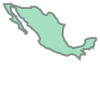

In [38]:
wkt.loads(mexico.take(1)[0].wkt)

### Colombia

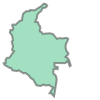

In [39]:
wkt.loads(colombia.take(1)[0].wkt)

### Venezuela

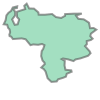

In [40]:
wkt.loads(venezuela.take(1)[0].wkt)

### Guyana

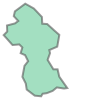

In [41]:
wkt.loads(guyana.take(1)[0].wkt)

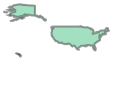

In [42]:
wkt.loads(usa.take(1)[0].wkt)

## 9. Filter Offshore Marine Zones that intersect with Countries (Mexico, Colombia, Venezuela, Guyana, USA) Boundaries

In [43]:
#load libraries pyspark
from pyspark.sql.types import *
from pyspark.sql.functions import udf

### Mexico

In [44]:
# User defined funtion for filtering region of interset
intersection_udf_mexico = udf(lambda row: True if mexico_boundary.intersects(wkt.loads(row)) else False, BooleanType())

In [45]:
#Mexico offshore marine zones
df_mexico = oz_spark_df.filter(intersection_udf_mexico(oz_spark_df["wkt"]))
pdf_mexico = df_mexico.toPandas() #convert to pandas datarframe
pdf_mexico

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,AMZ011,NH2,-81.74130,18.75795,from 18N-22N west of 85W to Yucatan Peninsula ...,Caribbean Nof 18N W of 85W including Yucatan B...,POLYGON ((-85.0035124029999452 21.654186627000...
1,GMZ025,NH2,-93.95211,21.57751,south of 22N between 87W-94W,E Bay of Campeche including Campeche Bank,POLYGON ((-87.0053766059999703 22.014180185000...
2,GMZ017,NH2,-93.95211,21.57751,between 22N-26N west of 94W,W Central Gulf from 22N to 26N W of 94W,POLYGON ((-93.9921787359999712 26.006293284000...
3,GMZ023,NH2,-93.95211,21.57751,south of 22N west of 94W,SW Gulf S of 22N W of 94W,POLYGON ((-93.9995355959999870 22.011966694000...


In [46]:
geometry = pdf_mexico['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_mexico = gpd.GeoDataFrame(pdf_mexico, crs=crs, geometry=geometry)
gdf_mexico

,ID,WFO,LON,LAT,LOCATION,NAME,wkt,geometry
0,AMZ011,NH2,-81.74130,18.75795,from 18N-22N west of 85W to Yucatan Peninsula ...,Caribbean Nof 18N W of 85W including Yucatan B...,POLYGON ((-85.0035124029999452 21.654186627000...,POLYGON ((-85.00351240299995 21.65418662700006...
1,GMZ025,NH2,-93.95211,21.57751,south of 22N between 87W-94W,E Bay of Campeche including Campeche Bank,POLYGON ((-87.0053766059999703 22.014180185000...,POLYGON ((-87.00537660599997 22.01418018500004...
2,GMZ017,NH2,-93.95211,21.57751,between 22N-26N west of 94W,W Central Gulf from 22N to 26N W of 94W,POLYGON ((-93.9921787359999712 26.006293284000...,POLYGON ((-93.99217873599997 26.00629328400004...
3,GMZ023,NH2,-93.95211,21.57751,south of 22N west of 94W,SW Gulf S of 22N W of 94W,POLYGON ((-93.9995355959999870 22.011966694000...,POLYGON ((-93.99953559599999 22.01196669400002...


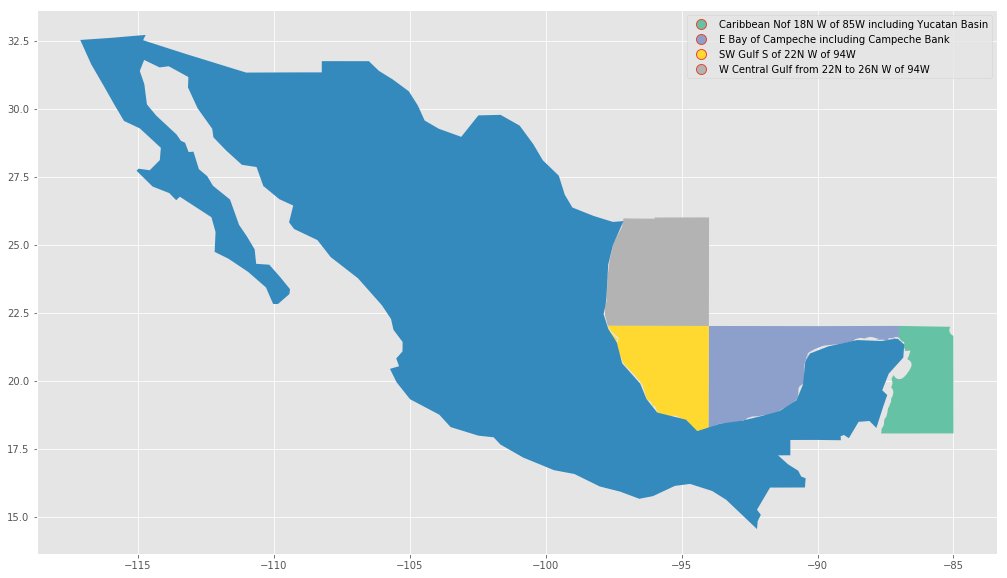

In [47]:
# Set the region
world[world['name']=='Mexico'].plot(ax=gdf_mexico.plot(cmap='Set2',column="NAME",categorical=True, legend=True,alpha=1,figsize=(20, 10)),alpha=1)
plt.show()

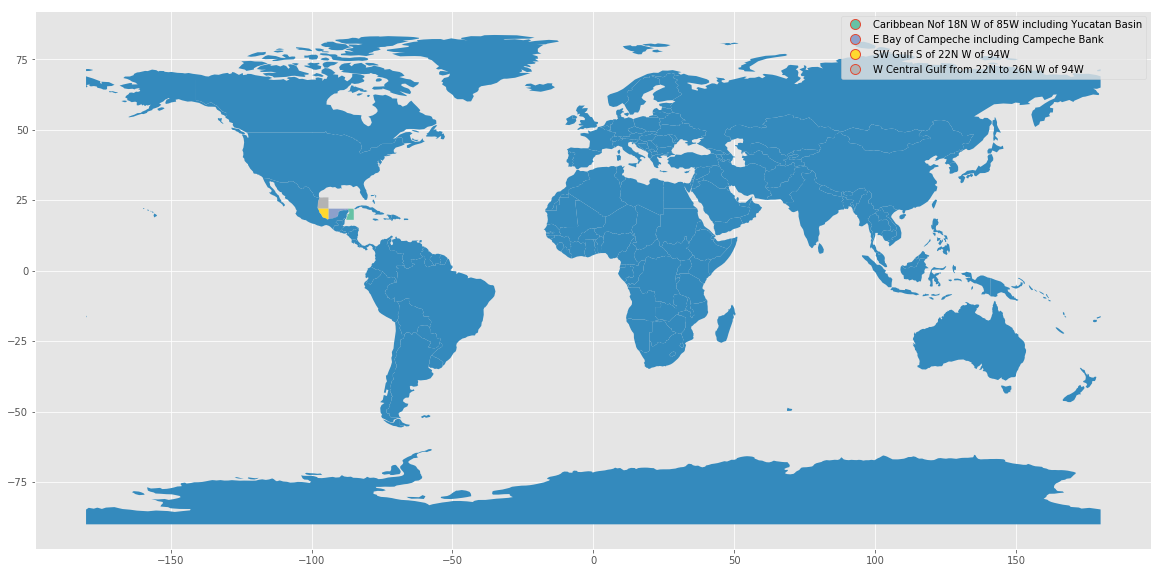

In [48]:
# Show map in the world maps
world.plot(ax=gdf_mexico.plot(cmap='Set2',column="NAME",categorical=True, legend=True, alpha=1,figsize=(20, 10))\
           ,alpha=1)
plt.show()

In [49]:
gdf_mexico.describe()

,LON,LAT
count,4.000000,4.00000
mean,-90.899408,20.87262
std,6.105405,1.40978
min,-93.952110,18.75795
25%,-93.952110,20.87262
50%,-93.952110,21.57751
75%,-90.899407,21.57751
max,-81.741300,21.57751


### Colombia

In [50]:
intersection_udf_colombia = udf(lambda row: True if colombia_boundary.intersects(wkt.loads(row))
                       else False, BooleanType())

In [51]:
df_colombia = oz_spark_df.filter(intersection_udf_colombia(oz_spark_df["wkt"]))
pdf_colombia = df_colombia.toPandas() #convert to pandas dataframe
pdf_colombia

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,AMZ039,NH2,-79.34953,11.83763,south of 11N between Colombia and Costa Rica,SW Caribbean S of 11N including the approaches...,POLYGON ((-80.0132461609999837 10.989629904000...


In [52]:
geometry = pdf_colombia['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_colombia = gpd.GeoDataFrame(pdf_colombia, crs=crs, geometry=geometry)
gdf_colombia

,ID,WFO,LON,LAT,LOCATION,NAME,wkt,geometry
0,AMZ039,NH2,-79.34953,11.83763,south of 11N between Colombia and Costa Rica,SW Caribbean S of 11N including the approaches...,POLYGON ((-80.0132461609999837 10.989629904000...,POLYGON ((-80.01324616099998 10.98962990400003...


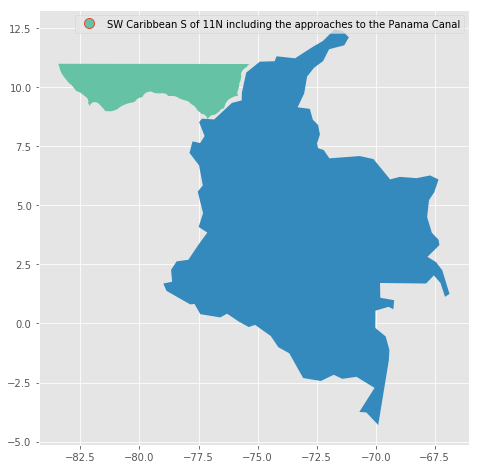

In [53]:
world[world['name']=='Colombia'].plot(ax=gdf_colombia.plot(cmap='Set2',column="NAME", categorical=True, legend=True,alpha=1,figsize=(16, 8)),alpha=1)
plt.show()

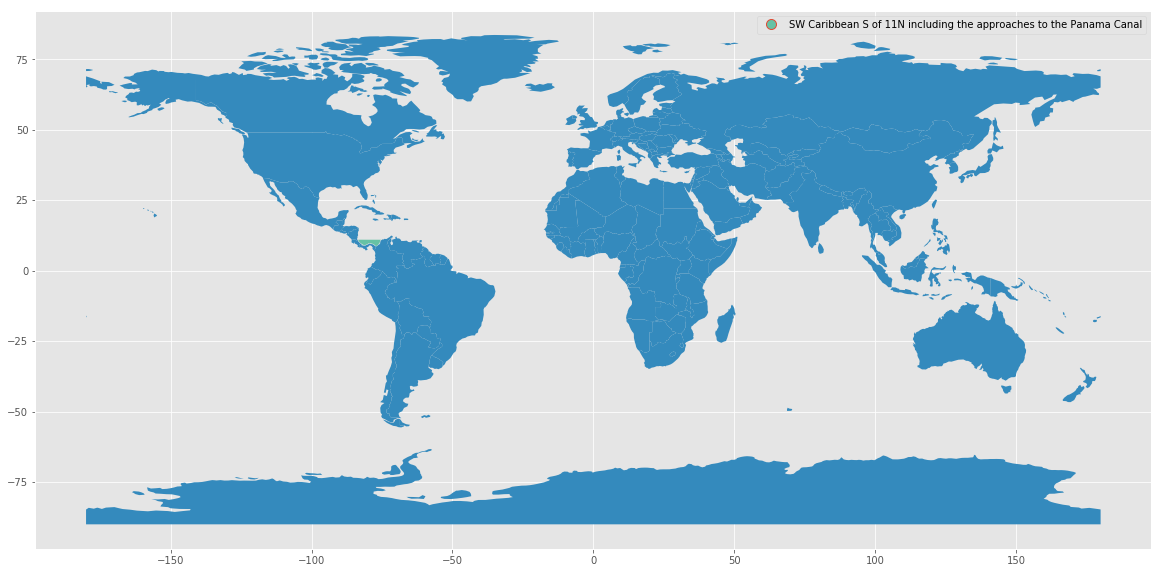

In [54]:
# Show the region in world maps
world.plot(ax=gdf_colombia.plot(cmap='Set2',column="NAME", categorical=True, legend=True,alpha=1,figsize=(20, 10)),alpha=1)
plt.show()

In [55]:
gdf_colombia.describe()

,LON,LAT
count,1.00000,1.00000
mean,-79.34953,11.83763
std,NaN,NaN
min,-79.34953,11.83763
25%,-79.34953,11.83763
50%,-79.34953,11.83763
75%,-79.34953,11.83763
max,-79.34953,11.83763


### Venezuela

In [56]:
# User defined funtion for filtering region of interset
intersection_udf_venezuela = udf(lambda row: True if venezuela_boundary.intersects(wkt.loads(row))
                                 else False, BooleanType())

In [57]:
df_venezuela = oz_spark_df.filter(intersection_udf_venezuela(oz_spark_df["wkt"]))
pdf_venezuela = df_venezuela.toPandas()
pdf_venezuela

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,AMZ037,NH2,-59.99007,14.44086,from 7N-15N between 55W-60W,Tropical N Atlantic from 7N and 15N between 55...,POLYGON ((-54.9801489519999791 15.002949367000...
1,AMZ035,NH2,-59.99007,14.44086,south of 15N between 60W-64W,Offshore Waters Windward Islands including Tri...,POLYGON ((-64.0074824779999858 15.031426411000...
2,AMZ033,NH2,-68.13905,15.13334,south of 15N between 64W-72W,Caribbean S of 15N between 64W and 72W includi...,MULTIPOLYGON (((-64.0074824779999858 15.031426...


In [58]:
geometry = pdf_venezuela['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_venezuela = gpd.GeoDataFrame(pdf_venezuela, crs=crs, geometry=geometry)
gdf_venezuela

,ID,WFO,LON,LAT,LOCATION,NAME,wkt,geometry
0,AMZ037,NH2,-59.99007,14.44086,from 7N-15N between 55W-60W,Tropical N Atlantic from 7N and 15N between 55...,POLYGON ((-54.9801489519999791 15.002949367000...,POLYGON ((-54.98014895199998 15.00294936700004...
1,AMZ035,NH2,-59.99007,14.44086,south of 15N between 60W-64W,Offshore Waters Windward Islands including Tri...,POLYGON ((-64.0074824779999858 15.031426411000...,POLYGON ((-64.00748247799999 15.03142641100004...
2,AMZ033,NH2,-68.13905,15.13334,south of 15N between 64W-72W,Caribbean S of 15N between 64W and 72W includi...,MULTIPOLYGON (((-64.0074824779999858 15.031426...,(POLYGON ((-64.00748247799999 15.0314264110000...


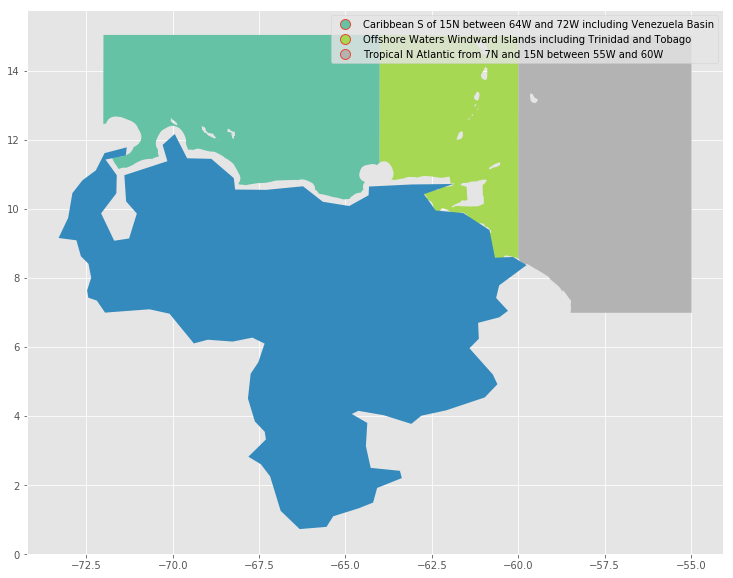

In [59]:
# Set the region of interest color to red
world[world['name']=='Venezuela'].plot(ax=gdf_venezuela.plot(cmap='Set2',column="NAME",categorical=True, legend=True, alpha=1, figsize=(20, 10)),alpha=1)
plt.show()

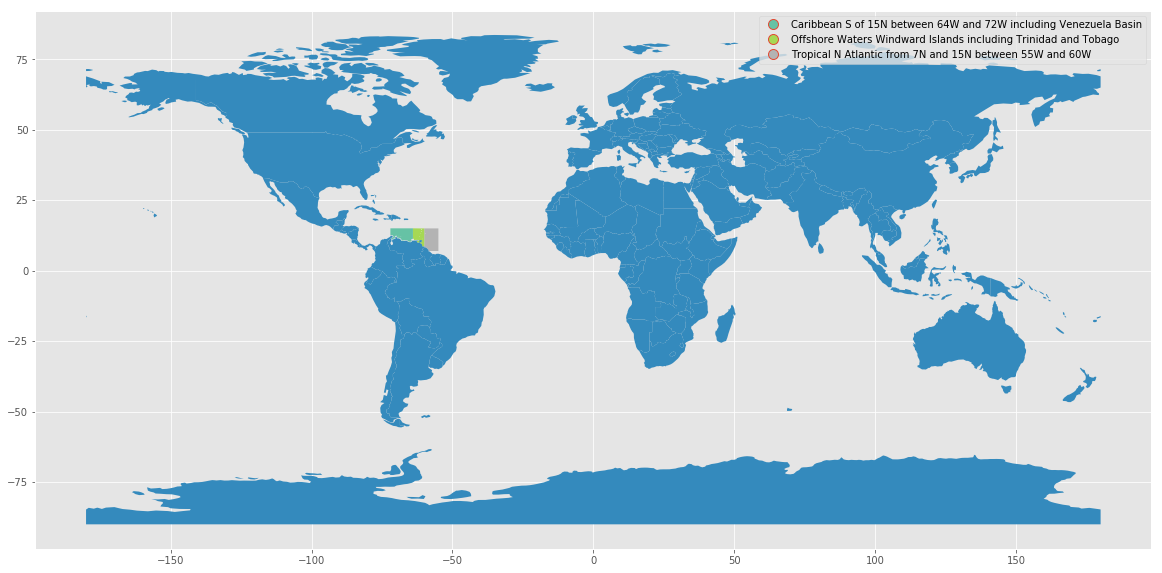

In [60]:
# Show the region in world map
world.plot(ax=gdf_venezuela.plot(cmap='Set2',column="NAME", categorical=True, legend=True, alpha=1, figsize=(20, 10)),alpha=1)
plt.show()

In [61]:
gdf_venezuela.describe()

,LON,LAT
count,3.000000,3.000000
mean,-62.706397,14.671687
std,4.704816,0.399804
min,-68.139050,14.440860
25%,-64.064560,14.440860
50%,-59.990070,14.440860
75%,-59.990070,14.787100
max,-59.990070,15.133340


### Guyana

In [62]:
intersection_udf_guyana = udf(lambda row: True if guyana_boundary.intersects(wkt.loads(row))
                              else False, BooleanType())

In [63]:
df_guyana = oz_spark_df.filter(intersection_udf_guyana(oz_spark_df["wkt"]))
pdf_guyana = df_guyana.toPandas()
pdf_guyana

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,AMZ037,NH2,-59.99007,14.44086,from 7N-15N between 55W-60W,Tropical N Atlantic from 7N and 15N between 55...,POLYGON ((-54.9801489519999791 15.002949367000...


In [64]:
geometry = pdf_guyana['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_guyana = gpd.GeoDataFrame(pdf_guyana, crs=crs, geometry=geometry)
gdf_guyana

,ID,WFO,LON,LAT,LOCATION,NAME,wkt,geometry
0,AMZ037,NH2,-59.99007,14.44086,from 7N-15N between 55W-60W,Tropical N Atlantic from 7N and 15N between 55...,POLYGON ((-54.9801489519999791 15.002949367000...,POLYGON ((-54.98014895199998 15.00294936700004...


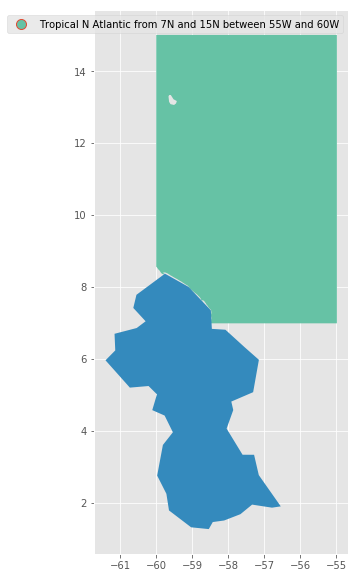

In [65]:
# Set the region
world[world['name']=='Guyana'].plot(ax=gdf_guyana.plot(cmap='Set2',column="NAME",categorical=True, legend=True,alpha=1,figsize=(20, 10)), alpha=1)
plt.show()

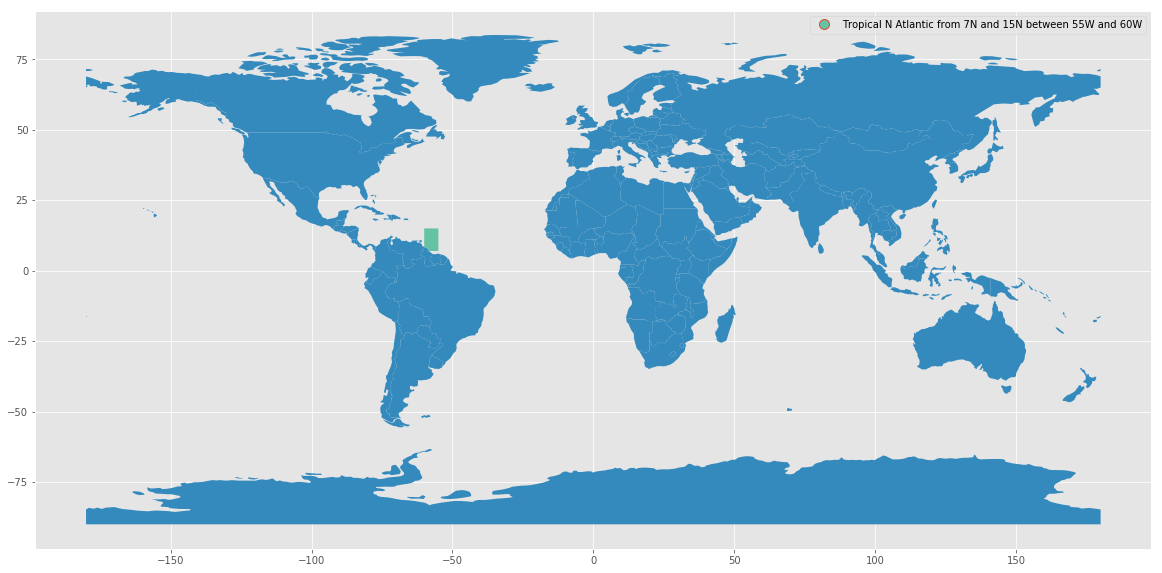

In [66]:
# Show the region in world maps
world.plot(ax=gdf_guyana.plot(cmap='Set2',column="NAME", categorical=True, legend=True, alpha=1,figsize=(20, 10)), alpha=1)
plt.show()

In [67]:
gdf_guyana.describe()

,LON,LAT
count,1.00000,1.00000
mean,-59.99007,14.44086
std,NaN,NaN
min,-59.99007,14.44086
25%,-59.99007,14.44086
50%,-59.99007,14.44086
75%,-59.99007,14.44086
max,-59.99007,14.44086


### United States of America (USA)

In [68]:
intersection_udf_usa = udf(lambda row: True if usa_boundary.intersects(wkt.loads(row))
                              else False, BooleanType())

In [69]:
df_usa = oz_spark_df.filter(intersection_udf_usa(oz_spark_df["wkt"]))
pdf_usa = df_usa.toPandas()
pdf_usa

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,GMZ017,NH2,-93.95211,21.57751,between 22N-26N west of 94W,W Central Gulf from 22N to 26N W of 94W,POLYGON ((-93.9921787359999712 26.006293284000...


In [70]:
geometry = pdf_usa['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_usa = gpd.GeoDataFrame(pdf_usa, crs=crs, geometry=geometry)
gdf_usa

,ID,WFO,LON,LAT,LOCATION,NAME,wkt,geometry
0,GMZ017,NH2,-93.95211,21.57751,between 22N-26N west of 94W,W Central Gulf from 22N to 26N W of 94W,POLYGON ((-93.9921787359999712 26.006293284000...,POLYGON ((-93.99217873599997 26.00629328400004...


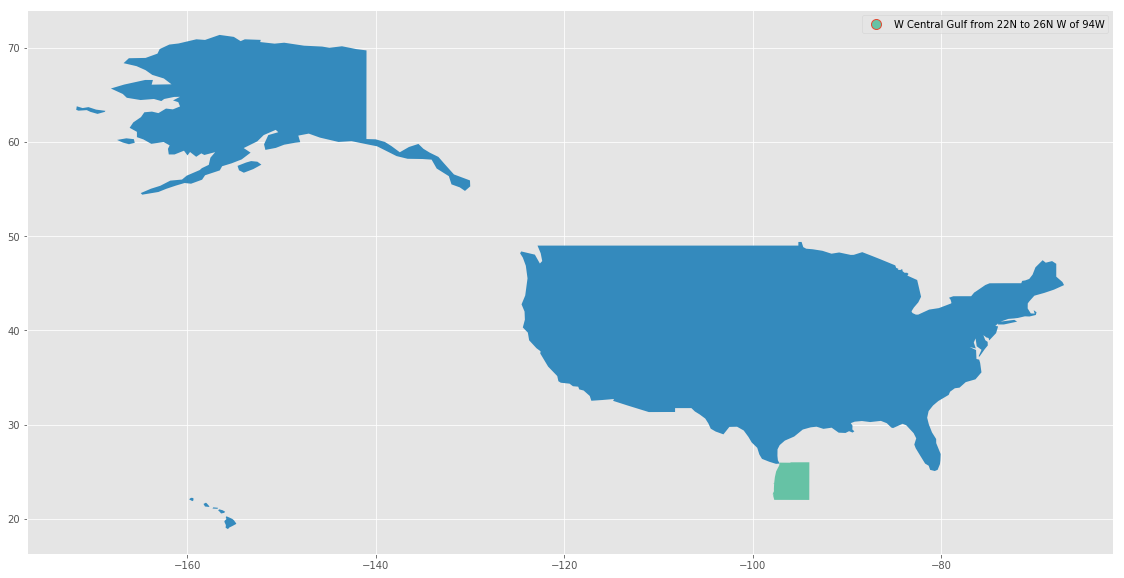

In [71]:
# Set the region
world[world['name']=='United States'].plot(ax=gdf_usa.plot(cmap='Set2',column="NAME", categorical=True,legend=True, alpha=1,figsize=(20, 10)),alpha=1)
plt.show()

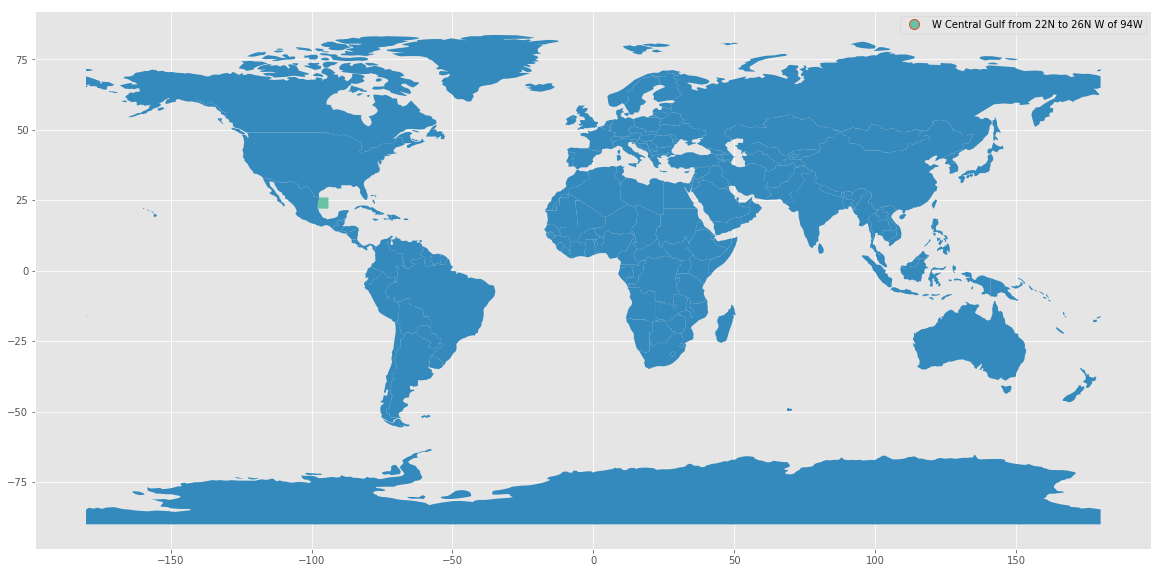

In [72]:
# Show the region in world maps
world.plot(ax=gdf_usa.plot(cmap='Set2',column="NAME", categorical=True, legend=True, alpha=1,figsize=(20, 10)),alpha=1)
plt.show()

In [73]:
gdf_usa.describe()

,LON,LAT
count,1.00000,1.00000
mean,-93.95211,21.57751
std,NaN,NaN
min,-93.95211,21.57751
25%,-93.95211,21.57751
50%,-93.95211,21.57751
75%,-93.95211,21.57751
max,-93.95211,21.57751


## 11. Select Boundaries for Weather Forecast Office (WFO)

In [74]:
oz_spark_df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- WFO: string (nullable = true)
 |-- LON: double (nullable = true)
 |-- LAT: double (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- wkt: string (nullable = true)



In [75]:
oz_spark_df.show()

+------+---+---------+--------+--------------------+--------------------+--------------------+
|    ID|WFO|      LON|     LAT|            LOCATION|                NAME|                 wkt|
+------+---+---------+--------+--------------------+--------------------+--------------------+
|AMZ031|NH2|-79.34953|11.83763|from 11N-15N betw...|Caribbean from 11...|POLYGON ((-72.006...|
|AMZ013|NH2| -81.7413|18.75795|north of 18N betw...|Caribbean N of 18...|POLYGON ((-82.344...|
|AMZ037|NH2|-59.99007|14.44086|from 7N-15N betwe...|Tropical N Atlant...|POLYGON ((-54.980...|
|AMZ121|NH2|-72.99113|24.81218|from 22N-27N betw...|Atlantic from 22N...|POLYGON ((-64.999...|
|AMZ011|NH2| -81.7413|18.75795|from 18N-22N west...|Caribbean Nof 18N...|POLYGON ((-85.003...|
|AMZ017|NH2| -81.7413|18.75795|south of 18N west...|    Gulf of Honduras|POLYGON ((-84.999...|
|AMZ019|NH2| -81.7413|18.75795|from 15N-18N betw...|Caribbean from 15...|POLYGON ((-80.001...|
|AMZ021|NH2| -81.7413|18.75795|from 15N-18N betw..

In [76]:
#show Weather forecast from offshore zone 
oz_spark_df.groupBy("WFO").count().show()

+---+-----+
|WFO|count|
+---+-----+
|NH2|   32|
|ONP|   19|
|AFC|    6|
|AFG|    3|
|HPA|    1|
|ONA|   18|
|AJK|    1|
+---+-----+



In [77]:
oz_spark_df.createOrReplaceTempView("offshore")

In [78]:
#HPA - Hawaii offshore zone
hpa = spark.sql("""
        SELECT wkt
        FROM offshore
        WHERE WFO='HPA'
        """)
#AJK - Alaska offshore zone
ajk = spark.sql("""
        SELECT wkt
        FROM offshore
        WHERE WFO='AJK'
        """)
#NH2 - Carribean offshore zone
nh2 = spark.sql("""
        SELECT wkt
        FROM offshore
        WHERE WFO='NH2'
        """)
#AFC - Bering sea offshore zone
afc = spark.sql("""
        SELECT wkt
        FROM offshore
        WHERE WFO='AFC'
        """)
#ONP - Oregon offshore zones USA
onp = spark.sql("""
        SELECT wkt
        FROM offshore
        WHERE WFO='ONP'
        """)
#ONA - mid-Atlantic
ona = spark.sql("""
        SELECT wkt
        FROM offshore
        WHERE WFO='ONA'
        """)
#AFG - Arctic Offshore
afg = spark.sql("""
        SELECT wkt
        FROM offshore
        WHERE WFO='AFG'
        """)

### Hawaii

<a href="http://tgftp.nws.noaa.gov/data/raw/fz/fzhw60.phfo.off.hfo.txt">OFFSHORE WATERS FORECAST for Hawaii</a>

Hawaiian offshore waters beyond 40 nautical miles out to 240
nautical miles including the portion of the Papahanaumokuakea
Marine National Monument east of French Frigate Shoals

Seas given as significant wave height, which is the average height
of the highest 1/3 of the waves. Individual waves may be more than
twice the significant wave height.

In [79]:
#show wkt item from hawaii
hpa.show()

+--------------------+
|                 wkt|
+--------------------+
|POLYGON ((-159.40...|
+--------------------+



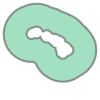

In [80]:
hpa_boundaries = wkt.loads(hpa.take(1)[0].wkt)
hpa_boundaries

In [81]:
# User defined funtion for filtering region of interset
within_udf_hpa = udf(lambda row: True if hpa_boundaries.within(wkt.loads(row))
                 else False, BooleanType())
df_hpa = oz_spark_df.filter(within_udf_hpa(oz_spark_df["wkt"]))
pdf_hpa = df_hpa.toPandas()
pdf_hpa

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,PHZ180,HPA,-160.87879,20.57628,None,Hawaiian Offshore Waters,POLYGON ((-159.4000661719999812 26.23540199700...


In [82]:
geometry = pdf_hpa['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_hpa = gpd.GeoDataFrame(pdf_hpa, crs=crs, geometry=geometry)

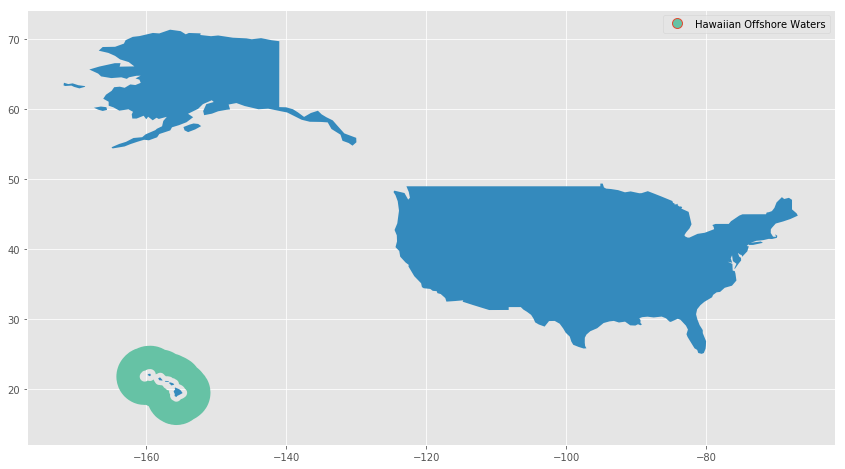

In [83]:
world[world['name']=='United States'].plot(ax=gdf_hpa.plot(cmap='Set2',column="NAME",categorical=True, legend=True, alpha=1, figsize=(16, 8)), alpha=1)
plt.show()

### Gulf of Alaska

<a href="http://tgftp.nws.noaa.gov/data/raw/fz/fzak67.pajk.off.ajk.txt">OFFSHORE WATERS FORECAST for Eastern Gulf Of Alaska</a>

Offshore waters forecast for Gulf of Alaska east of 144W

Wind forecasts reflect the predominant speed and direction
expected. Sea forecasts represent the average of the highest
one-third of the combined windwave and swell height.

In [84]:
#show wkt items from Gulf of Alaska
ajk.show()

+--------------------+
|                 wkt|
+--------------------+
|POLYGON ((-136.20...|
+--------------------+



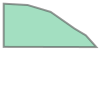

In [85]:
ajk_boundaries = wkt.loads(ajk.take(1)[0].wkt)
ajk_boundaries

In [86]:
# User defined funtion for filtering region of interset
intersection_udf_ajk = udf(lambda row: True if ajk_boundaries.intersects(wkt.loads(row))
                     else False, BooleanType())
df_ajk = oz_spark_df.filter(intersection_udf_ajk(oz_spark_df["wkt"]))
pdf_ajk = df_ajk.toPandas()
pdf_ajk

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,PKZ310,AJK,-140.06366,56.85343,None,Gulf of Alaska North of 55 Degrees North and E...,POLYGON ((-136.2045266229999925 55.10993149400...
1,PKZ351,AFC,-147.30655,57.92487,None,Gulf of Alaska Offshore North of 57N and West ...,POLYGON ((-144.0209541689999639 58.70624147600...
2,PKZ352,AFC,-149.07404,56.02611,None,Gulf of Alaska Offshore South of 57N North of ...,POLYGON ((-150.5965885299999627 57.05467993400...


In [87]:
geometry = pdf_ajk['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_ajk = gpd.GeoDataFrame(pdf_ajk, crs=crs, geometry=geometry)

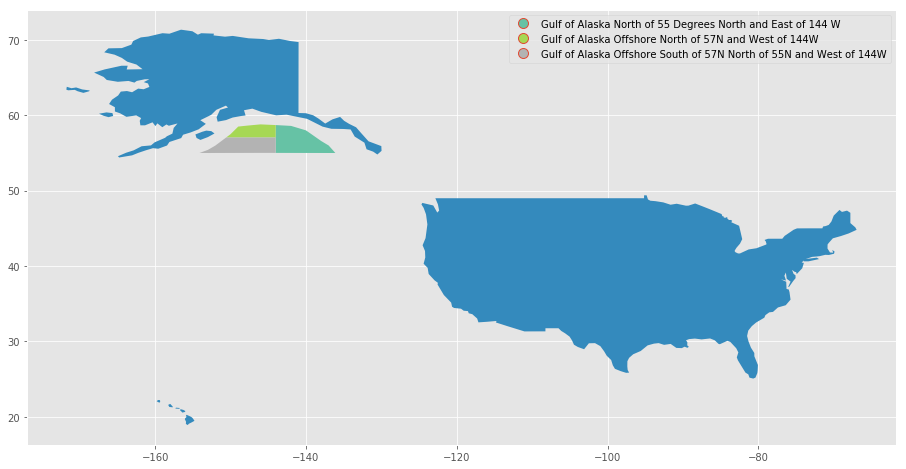

In [88]:
world[world['name']=='United States'].plot(ax=gdf_ajk.plot(cmap='Set2',column="NAME",categorical=True, legend=True,alpha=1, figsize=(16, 8)), alpha=1)
plt.show()

### Caribbean / Trophical Atlantic and Carribean

<a href="http://www.nws.noaa.gov/om/marine/zone/off/offnt3cmz.htm">OFFSHORE WATERS FORECAST SYNOPSIS for the Tropical Atlantic and Caribbean</a>

Offshore Waters Forecast for the Tropical N Atlantic from 07N to
22N between 55W and 64W, the SW N Atlantic S of 31N W of 65W
including Bahamas, and the Caribbean Sea.

Seas given as significant wave height, which is the average
height of the highest 1/3 of the waves. Individual waves may be
more than twice the significant wave height.

In [89]:
nh2.show()

+--------------------+
|                 wkt|
+--------------------+
|POLYGON ((-72.006...|
|POLYGON ((-82.344...|
|POLYGON ((-54.980...|
|POLYGON ((-64.999...|
|POLYGON ((-85.003...|
|POLYGON ((-84.999...|
|POLYGON ((-80.001...|
|POLYGON ((-72.898...|
|POLYGON ((-73.598...|
|POLYGON ((-80.013...|
|POLYGON ((-80.013...|
|POLYGON ((-69.844...|
|POLYGON ((-54.980...|
|POLYGON ((-70.008...|
|POLYGON ((-64.999...|
|POLYGON ((-70.021...|
|POLYGON ((-59.999...|
|POLYGON ((-64.007...|
|POLYGON ((-76.995...|
|MULTIPOLYGON (((-...|
+--------------------+
only showing top 20 rows



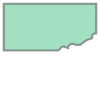

In [90]:
nh2_boundaries = wkt.loads(nh2.take(1)[0].wkt)
nh2_boundaries

In [91]:
# User defined funtion for filtering region of interset
intersection_udf_nh2 = udf(lambda row: True if nh2_boundaries.intersects(wkt.loads(row))
                     else False, BooleanType())
df_nh2 = oz_spark_df.filter(intersection_udf_nh2(oz_spark_df["wkt"]))
pdf_nh2 = df_nh2.toPandas()
pdf_nh2

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,AMZ031,NH2,-79.34953,11.83763,from 11N-15N between 72W-80W,Caribbean from 11N to 15N between 72W and 80W ...,POLYGON ((-72.0060664949999705 15.030321572000...
1,AMZ019,NH2,-81.74130,18.75795,from 15N-18N between 80W-85W,Caribbean from 15N to 18N between 80W and 85W,POLYGON ((-80.0013789839999845 18.050949805000...
2,AMZ021,NH2,-81.74130,18.75795,from 15N-18N between 72W-80W,Caribbean from 15N to 18N between 72W and 80W,POLYGON ((-72.8987445179999440 17.942300316000...
3,AMZ039,NH2,-79.34953,11.83763,south of 11N between Colombia and Costa Rica,SW Caribbean S of 11N including the approaches...,POLYGON ((-80.0132461609999837 10.989629904000...
4,AMZ029,NH2,-79.34953,11.83763,from 11N-15N west of 80W,W Central Caribbean from 11N to 15N W of 80W,POLYGON ((-80.0132461609999837 10.989629904000...
5,AMZ023,NH2,-68.13905,15.13334,from 15N-18N between 64W-72W,Caribbean N of 15N between 64W and 72W,POLYGON ((-69.8445775509999862 18.265387985000...
6,AMZ033,NH2,-68.13905,15.13334,south of 15N between 64W-72W,Caribbean S of 15N between 64W and 72W includi...,MULTIPOLYGON (((-64.0074824779999858 15.031426...


In [92]:
geometry = pdf_nh2['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_nh2 = gpd.GeoDataFrame(pdf_nh2, crs=crs, geometry=geometry)

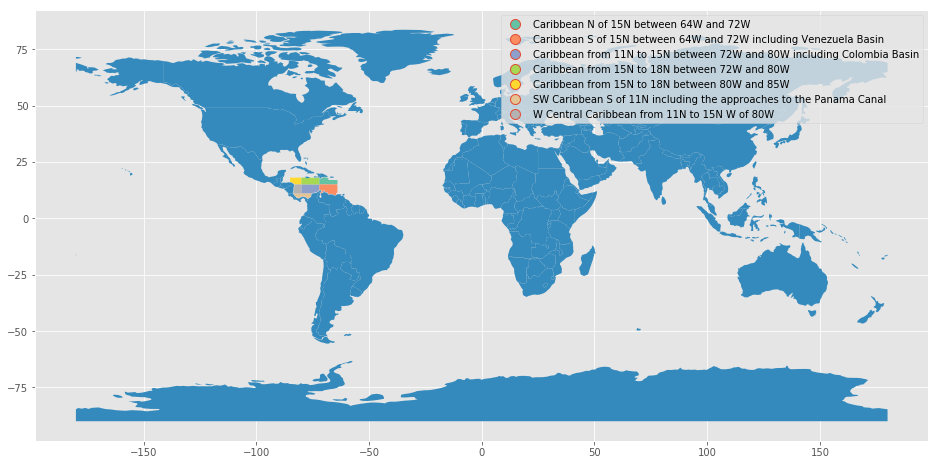

In [93]:
world.plot(ax=gdf_nh2.plot(cmap='Set2', alpha=1, column="NAME",categorical=True, legend=True,figsize=(16, 8)), alpha=1)
plt.show()

### Bering Sea

<a href="http://tgftp.nws.noaa.gov/data/forecasts/marine/offshore/pk/pkz499.txt">Offshore Waters Forecast for the Bering Sea</a>

Wind forecasts reflect the predominant speed and direction
expected. Sea forecasts represent an average of the highest
one-third of the combined wind wave and swell height.

In [94]:
afc.show()

+--------------------+
|                 wkt|
+--------------------+
|POLYGON ((180.000...|
|POLYGON ((-144.02...|
|POLYGON ((-150.59...|
|POLYGON ((-177.99...|
|POLYGON ((-163.99...|
|POLYGON ((-170.99...|
+--------------------+



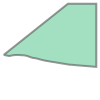

In [95]:
afc_boundaries = wkt.loads(afc.take(1)[0].wkt)
afc_boundaries

In [96]:
# User defined funtion for filtering region of interset
intersection_udf_afc = udf(lambda row: True if afc_boundaries.intersects(wkt.loads(row)) 
                           else False, BooleanType())
df_afc = oz_spark_df.filter(intersection_udf_afc(oz_spark_df["wkt"]))
pdf_afc = df_afc.toPandas()
pdf_afc

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,PKZ411,AFC,-184.25,56.1,None,Bering Sea Offshore West of 180 and East of t...,POLYGON ((180.0000000000001137 56.044541186000...


In [97]:
geometry = pdf_afc['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_afc = gpd.GeoDataFrame(pdf_afc, crs=crs, geometry=geometry)

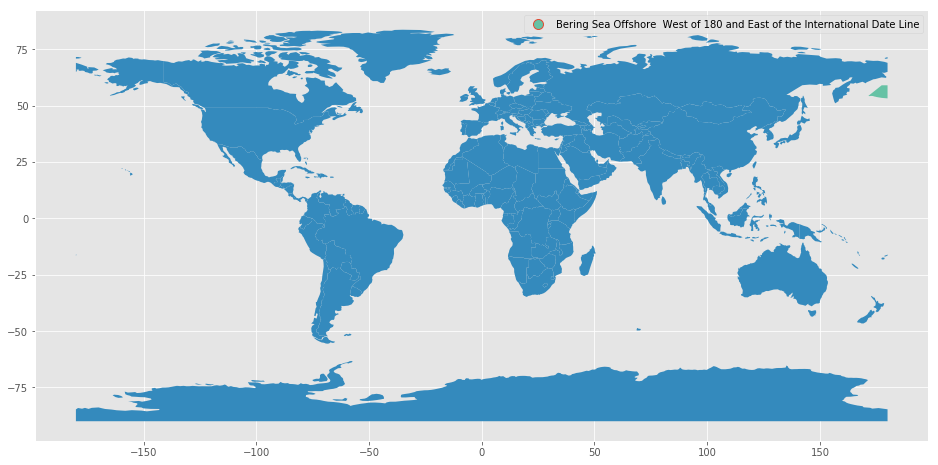

In [98]:
world.plot(ax=gdf_afc.plot(cmap='Set2',column="NAME",categorical=True, legend=True, alpha=1, figsize=(16, 8)), alpha=1)
plt.show()

### Oregon

<a href="http://tgftp.nws.noaa.gov/data/raw/fz/fzpn25.kwbc.off.pz5.txt">OFFSHORE WATERS FORECAST for Oregon and Washington</a>

Washington and Oregon waters-
Inner waters from  60 nm to 150 nm offshore.
Outer waters from 150 nm to 250 nm offshore.

Seas given as significant wave height, which is the average
height of the highest 1/3 of the waves. Individual waves may be
more than twice the significant wave height.


In [99]:
onp.show()

+--------------------+
|                 wkt|
+--------------------+
|POLYGON ((-127.94...|
|POLYGON ((-127.32...|
|POLYGON ((-126.69...|
|POLYGON ((-124.52...|
|POLYGON ((-119.95...|
|POLYGON ((-120.90...|
|POLYGON ((-122.89...|
|POLYGON ((-122.97...|
|POLYGON ((-125.69...|
|POLYGON ((-127.03...|
|POLYGON ((-125.51...|
|POLYGON ((-130.03...|
|POLYGON ((-125.51...|
|POLYGON ((-125.79...|
|POLYGON ((-125.10...|
|POLYGON ((-125.61...|
|POLYGON ((-123.89...|
|POLYGON ((-122.89...|
|POLYGON ((-118.98...|
+--------------------+



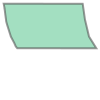

In [100]:
onp_boundaries = wkt.loads(onp.take(1)[0].wkt)
onp_boundaries

In [101]:
# User defined funtion for filtering region of interset
intersection_udf_onp = udf(lambda row: True if onp_boundaries.intersects(wkt.loads(row)) 
                           else False, BooleanType())
df_onp = oz_spark_df.filter(intersection_udf_onp(oz_spark_df["wkt"]))
pdf_onp = df_onp.toPandas()
pdf_onp

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,PZZ900,ONP,-128.24399,46.92668,None,Cape Flattery to Cape Shoalwater between 150 N...,POLYGON ((-127.9433348509999746 48.51260424600...
1,PZZ800,ONP,-128.24399,46.92668,None,Cape Flattery to Cape Shoalwater between 60 NM...,POLYGON ((-125.6992814129999942 46.74003600700...
2,PZZ905,ONP,-128.24399,46.92668,None,Cape Shoalwater to Cape Lookout between 150 NM...,POLYGON ((-127.0381578009999544 45.08483482600...
3,PZZ805,ONP,-128.24399,46.92668,None,Cape Shoalwater to Cape Lookout between 60 NM ...,POLYGON ((-125.5179195269999468 45.11623887900...


In [102]:
geometry = pdf_onp['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_onp = gpd.GeoDataFrame(pdf_onp, crs=crs, geometry=geometry)

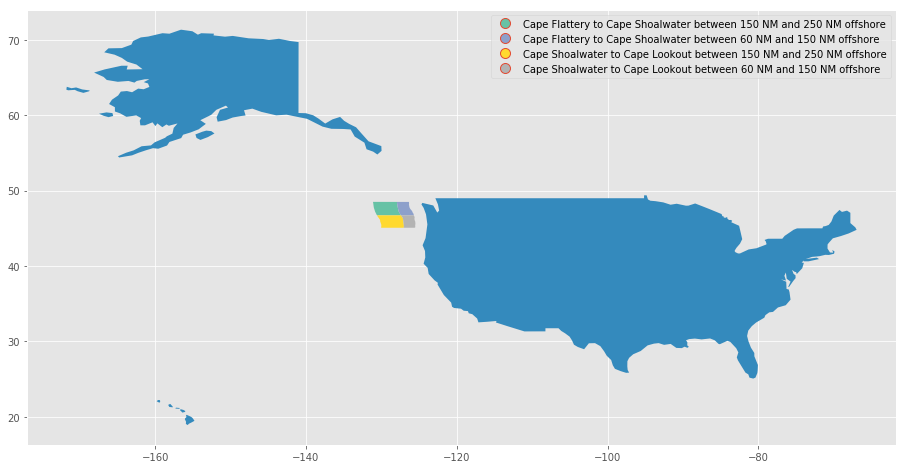

In [103]:
world[world['name']=='United States'].plot(ax=gdf_onp.plot(cmap='Set2',column="NAME",categorical=True, legend=True, alpha=1, figsize=(16, 8)), alpha=1)
plt.show()

#### Georges Bank

In [104]:
ona.show()

+--------------------+
|                 wkt|
+--------------------+
|POLYGON ((-68.894...|
|POLYGON ((-69.645...|
|POLYGON ((-73.516...|
|POLYGON ((-70.276...|
|POLYGON ((-67.284...|
|POLYGON ((-67.143...|
|POLYGON ((-71.393...|
|POLYGON ((-64.994...|
|POLYGON ((-65.748...|
|POLYGON ((-69.996...|
|POLYGON ((-69.001...|
|POLYGON ((-73.935...|
|POLYGON ((-73.929...|
|POLYGON ((-74.916...|
|POLYGON ((-75.003...|
|POLYGON ((-72.282...|
|POLYGON ((-76.958...|
|POLYGON ((-76.995...|
+--------------------+



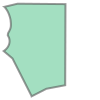

In [105]:
ona_boundaries = wkt.loads(ona.take(1)[0].wkt)
ona_boundaries

In [106]:
# User defined funtion for filtering region of interset
intersection_udf_ona = udf(lambda row: True if ona_boundaries.intersects(wkt.loads(row))
                     else False, BooleanType())
df_ona = oz_spark_df.filter(intersection_udf_ona(oz_spark_df["wkt"]))
pdf_ona = df_ona.toPandas()
pdf_ona

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,ANZ805,ONA,-67.79496,41.05695,None,Georges Bank between Cape Cod and 68W north of...,POLYGON ((-68.8948808749999557 39.801980058000...
1,ANZ810,ONA,-71.26536,40.21841,None,South of New England between the Great South C...,POLYGON ((-69.6452198549999366 41.007721721000...
2,ANZ800,ONA,-67.79496,41.05695,None,Gulf of Maine to the Hague Line,POLYGON ((-67.2840485229999672 44.172511153000...
3,ANZ900,ONA,-67.79496,41.05695,None,Georges Bank between 68W and the Hague Line,POLYGON ((-67.1436606699999743 42.258439835000...
4,ANZ905,ONA,-69.86162,38.74287,None,East of 69W to the Hague Line between 1000 FM ...,POLYGON ((-64.9949465829999440 39.732457114000...


In [107]:
geometry = pdf_ona['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_ona = gpd.GeoDataFrame(pdf_ona, crs=crs, geometry=geometry)

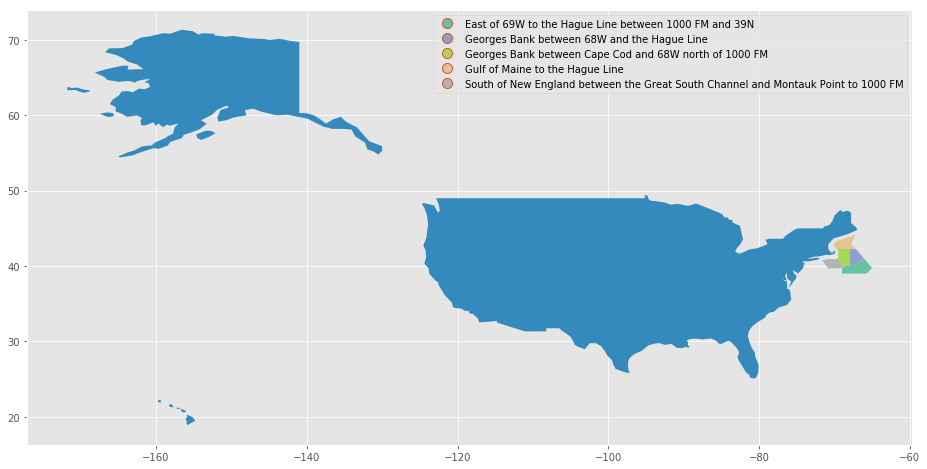

In [108]:
world[world['name']=='United States'].plot(ax=gdf_ona.plot(cmap='Set2',column="NAME",categorical=True, legend=True, alpha=1,figsize=(16, 8)), alpha=1)
plt.show()

### Arctic 

<a href="http://tgftp.nws.noaa.gov/data/raw/fz/fzak69.pafg.off.afg.txt">Offshore Waters Forecast for the US Arctic Waters</a>

Sea forecasts represent an average of the highest one-third of
the combined wind wave and swell height. Individual waves may be
twice as high.

In [109]:
afg.show()

+--------------------+
|                 wkt|
+--------------------+
|POLYGON ((-141.00...|
|POLYGON ((-151.46...|
|POLYGON ((-161.92...|
+--------------------+



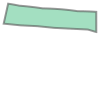

In [110]:
afg_boundaries = wkt.loads(afg.take(1)[0].wkt)
afg_boundaries

In [111]:
# User defined funtion for filtering region of interset
intersection_udf_afg = udf(lambda row: True if afg_boundaries.intersects(wkt.loads(row))
                     else False, BooleanType())
df_afg = oz_spark_df.filter(intersection_udf_afg(oz_spark_df["wkt"]))
pdf_afg = df_afg.toPandas()
pdf_afg

,ID,WFO,LON,LAT,LOCATION,NAME,wkt
0,PKZ510,AFG,-145.819,72.621,None,Eastern US Arctic Offshore,POLYGON ((-141.0067875519999916 73.39924267400...
1,PKZ505,AFG,-158.049,73.283,None,Central US Arctic Offshore,POLYGON ((-151.4685634519999837 74.36708417100...


In [112]:
geometry = pdf_afg['wkt'].map(wkt.loads)
crs = {'init': 'epsg:4326'}
gdf_afg = gpd.GeoDataFrame(pdf_afg, crs=crs, geometry=geometry)

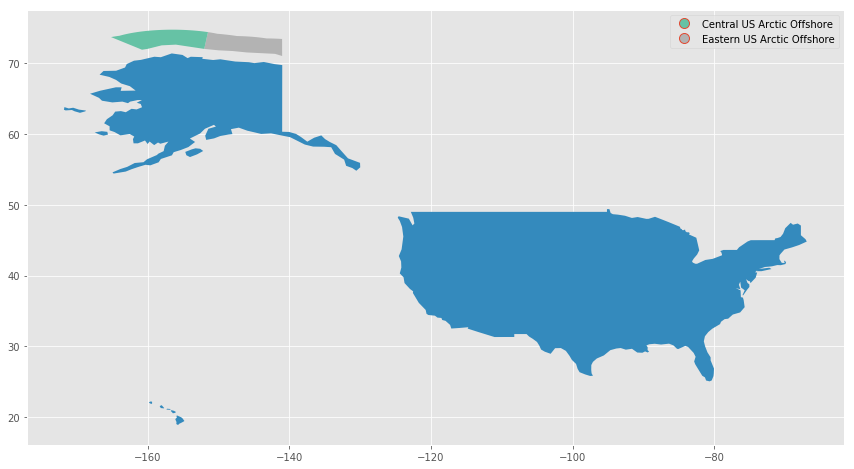

In [113]:
world[world['name']=='United States'].plot(ax=gdf_afg.plot(cmap='Set2',column="NAME",categorical=True, legend=True, alpha=1,figsize=(16, 8)), alpha=1)
plt.show()